In [24]:
import tensorflow as tf

In [25]:
print(tf.__version__)

2.8.2


In [26]:
import tensorflow_datasets as tsdf

In [27]:
tsdf.list_builders()

['abstract_reasoning',
 'accentdb',
 'aeslc',
 'aflw2k3d',
 'ag_news_subset',
 'ai2_arc',
 'ai2_arc_with_ir',
 'amazon_us_reviews',
 'anli',
 'answer_equivalence',
 'arc',
 'asqa',
 'asset',
 'assin2',
 'bair_robot_pushing_small',
 'bccd',
 'beans',
 'bee_dataset',
 'beir',
 'big_patent',
 'bigearthnet',
 'billsum',
 'binarized_mnist',
 'binary_alpha_digits',
 'ble_wind_field',
 'blimp',
 'booksum',
 'bool_q',
 'c4',
 'caltech101',
 'caltech_birds2010',
 'caltech_birds2011',
 'cardiotox',
 'cars196',
 'cassava',
 'cats_vs_dogs',
 'celeb_a',
 'celeb_a_hq',
 'cfq',
 'cherry_blossoms',
 'chexpert',
 'cifar10',
 'cifar100',
 'cifar10_1',
 'cifar10_corrupted',
 'citrus_leaves',
 'cityscapes',
 'civil_comments',
 'clevr',
 'clic',
 'clinc_oos',
 'cmaterdb',
 'cnn_dailymail',
 'coco',
 'coco_captions',
 'coil100',
 'colorectal_histology',
 'colorectal_histology_large',
 'common_voice',
 'coqa',
 'cos_e',
 'cosmos_qa',
 'covid19',
 'covid19sum',
 'crema_d',
 'criteo',
 'cs_restaurants',
 'cura

In [28]:
import numpy as np
import matplotlib.pyplot as plt

In [29]:
import math

In [30]:
mnist_training,mnist_test =tsdf.load("mnist",split=['train','test'],batch_size=-1,as_supervised=True)

In [31]:
print(mnist_training)

(<tf.Tensor: shape=(60000, 28, 28, 1), dtype=uint8, numpy=
array([[[[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        ...,

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]]],


       [[[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        ...,

        [[0

In [32]:
mnist_training_images,mnist_training_labels =mnist_training[0],mnist_training[1]

In [33]:
mnist_test_images,mnist_test_labels =mnist_test[0],mnist_test[1]

In [34]:
print(mnist_training_images.shape)
print(mnist_training_labels.shape)

(60000, 28, 28, 1)
(60000,)


In [35]:
print(mnist_test_images.shape)

(10000, 28, 28, 1)


In [36]:
print(mnist_test_labels.shape)

(10000,)


tf.Tensor(4, shape=(), dtype=int64)


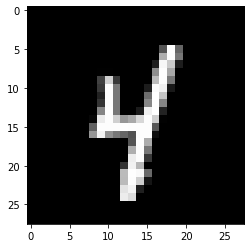

In [37]:
plt.imshow( tf.squeeze(mnist_training_images[0]) ,cmap="gray")
print(mnist_training_labels[0])

In [38]:
num_training_images= mnist_training_images.shape[0]
num_test_images= mnist_test_images.shape[0]
img_width, img_height = mnist_training_images.shape[1], mnist_training_images.shape[2]
mnist_training_images= tf.reshape(mnist_training_images, shape=(num_training_images,img_width * img_height))
mnist_test_images= tf.reshape(mnist_test_images, shape=(num_test_images,img_width * img_height))
print(mnist_training_images.shape)
print(np.amax(mnist_training_images[0]),np.amin(mnist_training_images[0]))
print(np.amax(mnist_training_labels[0]),np.amin(mnist_training_labels[0]))






(60000, 784)
255 0
4 4


In [39]:
print(mnist_training_images.shape)
print(np.amax(mnist_training_images[0]),np.amin(mnist_training_images[0]))
print(np.amax(mnist_training_labels),np.amin(mnist_training_labels))

(60000, 784)
255 0
9 0


In [40]:
def preprocess(x,y):
  x=tf.cast(x,tf.float32)/ 255.0
  y= tf.cast(y,tf.int64)
  return x,y
def create_dataset(xs,ys,n_classes=10):
  ys=tf.one_hot(ys,depth=n_classes)
  return tf.data.Dataset.from_tensor_slices((xs,ys)).map(preprocess).shuffle(len(ys)).batch(128)



In [41]:
train_dataset =create_dataset(mnist_training_images,mnist_training_labels)
test_dataset= create_dataset(mnist_test_images,mnist_test_labels)

In [42]:
print(train_dataset)

<BatchDataset element_spec=(TensorSpec(shape=(None, 784), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.int64, name=None))>


In [43]:
batch_images, batch_labels = next(iter(train_dataset))
print(batch_images.shape)
print(batch_labels.shape)
print(batch_images[0])
print(batch_labels[0])

(128, 784)
(128, 10)
tf.Tensor(
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0

In [44]:
input_shape = 784
label_shape = 10

lr = 0.003 

layer_neurons =[
    [input_shape,200],
    [200,80],
    [80,label_shape]
]

bias_shape = [200,80,label_shape]

initializer = tf.initializers.glorot_uniform()

In [45]:
def dense_layer(inputs,weights,bias):
  return tf.nn.sigmoid(tf.matmul(inputs,weights)+bias)
  

In [48]:
def get_weight(shape,name):
  return tf.Variable(initializer(shape),name=name,trainable=True ,dtype =tf.float32)

def get_bias(shape,name):
  return tf.Variable(initializer([shape]),name=name,trainable=True ,dtype =tf.float32)



In [49]:
weights=[]
bias=[]

i=0

for layer in layer_neurons:
  
  weights.append(get_weight(layer,'weight{}'.format(i)))
  i+=1


i=0

for layer in bias_shape:
  bias.append(get_bias(layer,'bias{}'.format(i)))
  i+=1  

In [50]:
def model(input):
  l1=dense_layer(input,weights[0],bias[0])
  l2=dense_layer(l1,weights[1],bias[1])
  l3=dense_layer(l2,weights[2],bias[2])
  return l3


In [52]:
optimizer=tf.optimizers.Adam(lr)
def loss(pred,target):
  return tf.nn.softmax_cross_entropy_with_logits(target,pred)

In [66]:
def train_step(model,inputs,outputs,epoch):
  epoch_loss_avg=None
  with tf.GradientTape() as tape:
    current_loss=loss(model(inputs),outputs)
    grads=tape.gradient(current_loss,weights)
    optimizer.apply_gradients(zip(grads,weights))
  epoch_loss_avg = tf.reduce_mean(current_loss)
  return epoch_loss_avg   

In [67]:
num_epochs =10

for epoch in range(num_epochs):
  epoch_loss=0
  i=0
  for train_data in train_dataset:
    batch_images, batch_labels=train_data
    iter_loss = train_step(model,batch_images,batch_labels,epoch)
    epoch_loss += iter_loss
    i +=1
  print("On epoch {}".format(epoch))
  tf.print("Loss:",epoch_loss/i)  

On epoch 0
Loss: 1.61749983
On epoch 1
Loss: 1.51347435
On epoch 2
Loss: 1.49694479
On epoch 3
Loss: 1.48780513
On epoch 4
Loss: 1.48225522
On epoch 5
Loss: 1.47792256
On epoch 6
Loss: 1.47516072
On epoch 7
Loss: 1.47298717
On epoch 8
Loss: 1.47102475
On epoch 9
Loss: 1.46960437


In [69]:
acc=0

for test_data in test_dataset:
  batch_images,batch_labels = test_data
  predictions=model(batch_images)
  predictions=tf.nn.softmax(predictions)
  equality= tf.math.equal(np.argmax(predictions,axis=1), np.argmax(batch_labels, axis=1))
  acc += np.sum(equality)
acc /= 10000
print(acc)  


0.9755
